In [32]:
stocks_data=pd.read_csv("stocks.csv")

In [33]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"


stocks_data = pd.read_csv("stocks.csv")
print(stocks_data.head())

  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


# 1. Descriptive Statistics

In [34]:
descriptive_stats = stocks_data.groupby('Ticker')['Close'].describe()
print(descriptive_stats)

        count        mean        std         min         25%         50%  \
Ticker                                                                     
AAPL     62.0  158.240645   7.360485  145.309998  152.077499  158.055000   
GOOG     62.0  100.631532   6.279464   89.349998   94.702501  102.759998   
MSFT     62.0  275.039839  17.676231  246.270004  258.742500  275.810013   
NFLX     62.0  327.614677  18.554419  292.760010  315.672493  325.600006   

               75%         max  
Ticker                          
AAPL    165.162506  173.570007  
GOOG    105.962503  109.459999  
MSFT    287.217506  310.649994  
NFLX    338.899994  366.829987  


Insights of GOOGLE!
- Count: 62 trading days included in the dataset for Google.
- Mean: 100 is the mean value of closing prices.
- Median: 100.33 is the median value of closing prices.
- Standard Deviation: Google varies 6.3 of closing prices.
- Minimum: 89.34 is lowesst closing price.
- Maximum: 109.45 is the highest closing price.
- Percentile 25%: 94.70
- Percentile 75%: 105.96

# 2. Time Series Analysis

Time series analysis in the stock market involves examining historical closing prices to identify trends and patterns. This analysis helps in making informed investment decisions and managing risks based on historical data patterns and trends.




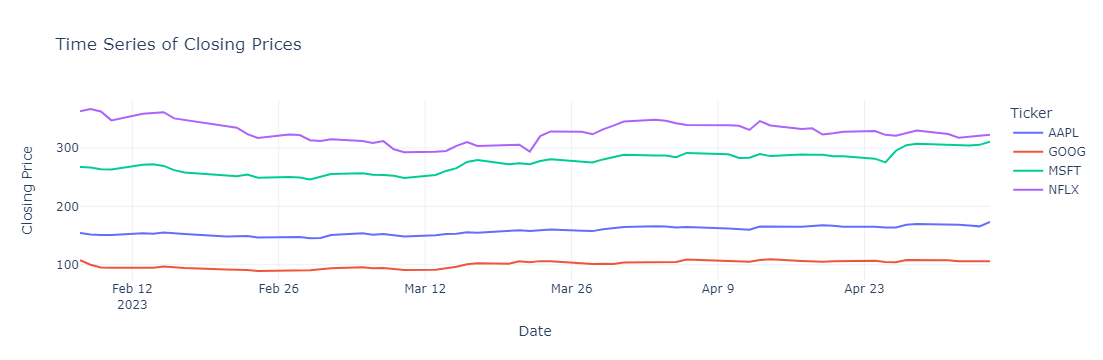

In [35]:
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
pivot_data = stocks_data.pivot(index='Date', columns='Ticker', values='Close')

fig = make_subplots(rows=1, cols=1)

for column in pivot_data.columns:
    fig.add_trace(
        go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column),
        row=1, col=1
    )

fig.update_layout(
    title_text='Time Series of Closing Prices',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Ticker',
    showlegend=True
)

fig.show()

The above chart displays the trends of the stocks.

- Apple and Google are facing consolidation and neftlix seems to be volatile, where as microsoft is showing constant upward momemntum.

# 3. Volatility Analysis

Volatility analysis in the stock market involves assessing the degree of variation or fluctuation in the price of a financial instrument over time. It is a crucial metric for measuring risk and can be calculated using historical price data. Investors use volatility analysis to gauge potential market movements, set risk management strategies, and make informed decisions based on the level of price uncertainty.

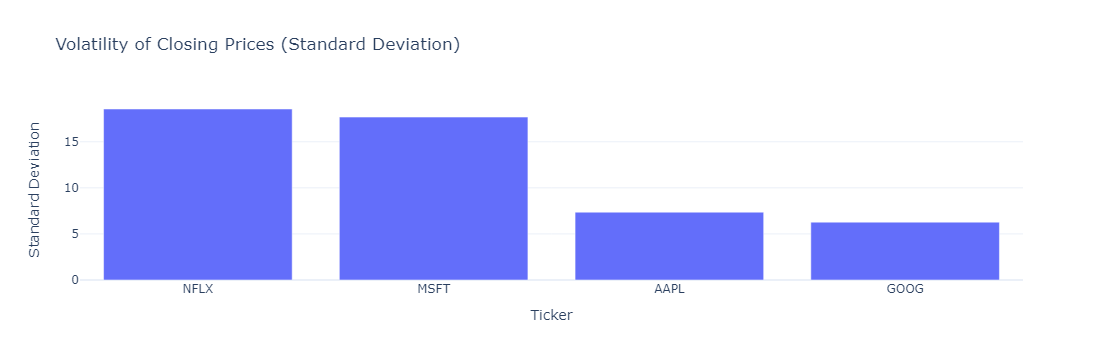

In [36]:
volatility = pivot_data.std().sort_values(ascending=False)

fig = px.bar(volatility,
             x=volatility.index,
             y=volatility.values,
             labels={'y': 'Standard Deviation', 'x': 'Ticker'},
             title='Volatility of Closing Prices (Standard Deviation)')

fig.show()

- Google: 6.28 least volatile.
- Apple: 7.36 moderately volatile. 
- Microsoft: 17.68 Highly volatile.
- Netflix: 18.55 Highly Volatile.

It suggests that compared to Apple and Google, Netflix and Microsoft equities were more volatile in price during this time.

# 4. Correlation Analysis

Correlation analysis in the stock market involves examining the statistical relationship between the prices of two or more financial instruments. This analysis helps investors understand how different assets move in relation to each other. 

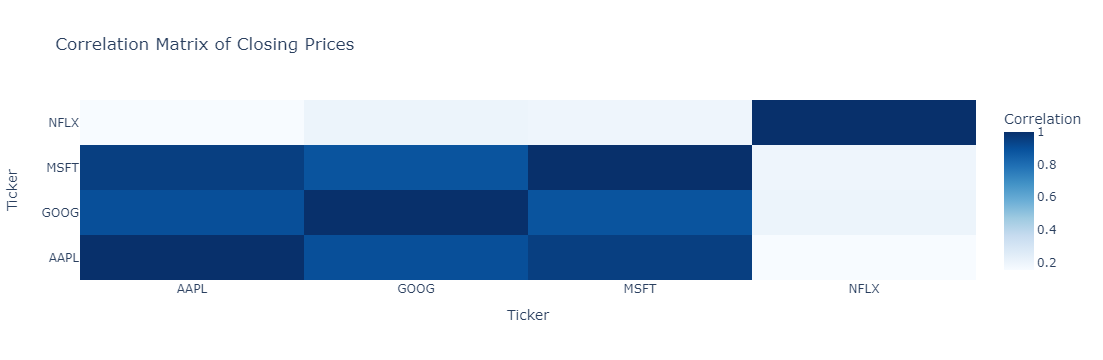

In [37]:
correlation_matrix = pivot_data.corr()

fig = go.Figure(data=go.Heatmap(
                    z=correlation_matrix,
                    x=correlation_matrix.columns,
                    y=correlation_matrix.columns,
                    colorscale='blues',
                    colorbar=dict(title='Correlation'),
                    ))

fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title='Ticker',
    yaxis_title='Ticker'
)

fig.show()

The heatmap above displays the correlation matrix of the closing prices of the stocks (Apple, Google, Microsoft, Netflix).

- Values close to +1 indicate a strong positive correlation, meaning that as one stock’s price increases, the other tends to increase as well.
- Values close to -1 indicate a strong negative correlation, where one stock’s price increase corresponds to a decrease in the other.
- Values around 0 indicate a lack of correlation.

# 5. Comparative Analysis

In comparative analysis, we assess the performance of various stocks by comparing their returns over the specified period. The evaluation involves calculating the percentage change in closing prices from the beginning to the end of the period for each respective stock.

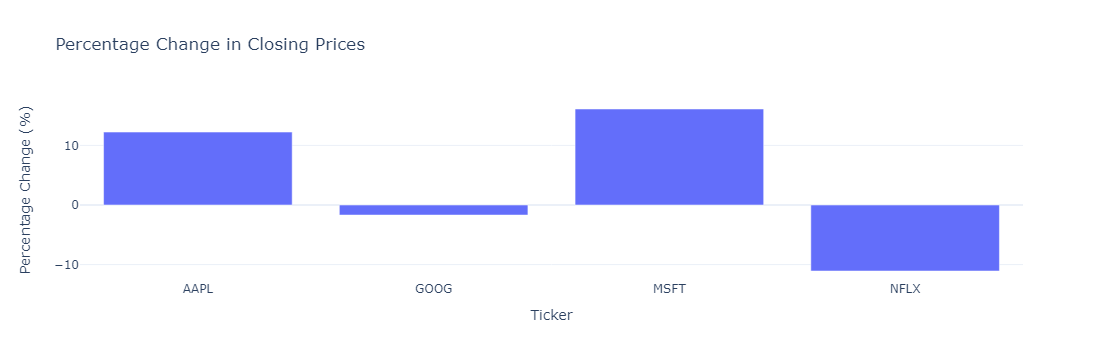

In [39]:
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100

fig = px.bar(percentage_change,
             x=percentage_change.index,
             y=percentage_change.values,
             labels={'y': 'Percentage Change (%)', 'x': 'Ticker'},
             title='Percentage Change in Closing Prices')

fig.show()

- Apple: 12.23 
- google: 1.69
- Microsoft: 16.1
- Netflix: -11.07

Every stock had a psoitive change except Netflix!

# 6. Daily Risk vs Return Analysis

In this analysis, I'll calculate the average daily return and the standard deviation of daily returns for each stock. The standard deviation will function as a proxy for risk, while the average daily return will signify the expected return.

These values will be plotted to visually assess the risk-return profile of each stock. Generally, stocks with higher average returns and lower risk (standard deviation) are deemed more desirable, although investment decisions often hinge on the investor's risk tolerance.

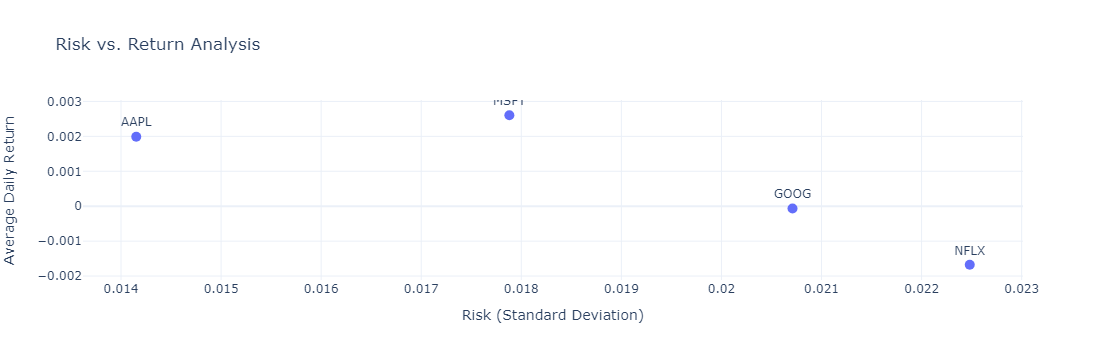

In [48]:
daily_returns = pivot_data.pct_change().dropna()

avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=risk_return_df['Risk'],
    y=risk_return_df['Average Daily Return'],
    mode='markers+text',
    text=risk_return_df.index,
    textposition="top center",
    marker=dict(size=10)
))

fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False
)

fig.show()

So, Apple demonstrates the lowest risk coupled with a positive average daily return, indicating a more stable investment with consistent returns. Google exhibits higher volatility than Apple and, on average, a slightly negative daily return, signifying a riskier and less rewarding investment during this period.

Microsoft shows moderate risk with the highest average daily return, suggesting a potentially more rewarding investment, albeit with higher volatility compared to Apple. Netflix demonstrates the highest risk and a negative average daily return, implying it was the most volatile and least rewarding investment among these stocks over the analyzed period.